In [27]:
import pandas as pd
top50_df = pd.read_csv("top10s_2010_2019.csv", encoding='latin-1')
top50_df.head()
top50_df = top50_df.rename(columns={"pop" : "Popularity"})

#top50_df["Popularity"].hist()
top50_df = top50_df.loc[top50_df["Popularity"] >= 20]

In [28]:
import matplotlib.pyplot as plt
from sklearn import linear_model
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [29]:
#Get the dummies and store it in a variable
dummies = pd.get_dummies(top50_df["top genre"])
#Concatenate the dummies to the original dataframe
top50_df = pd.concat([top50_df, dummies], axis='columns')
#Drop the values
top50_df.drop(['top genre'], inplace=True, axis='columns')
#Print new dataframe
top50_df.head()

,Unnamed: 0,title,artist,year,bpm,nrgy,dnce,dB,live,val,...,house,indie pop,irish singer-songwriter,latin,metropopolis,moroccan pop,neo mellow,permanent wave,pop,tropical house
0,1,"Hey, Soul Sister",Train,2010,97,89,67,-4,8,80,...,0,0,0,0,0,0,1,0,0,0
1,2,Love The Way You Lie,Eminem,2010,87,93,75,-5,52,64,...,0,0,0,0,0,0,0,0,0,0
2,3,TiK ToK,Kesha,2010,120,84,76,-3,29,71,...,0,0,0,0,0,0,0,0,0,0
3,4,Bad Romance,Lady Gaga,2010,119,92,70,-4,8,71,...,0,0,0,0,0,0,0,0,0,0
4,5,Just the Way You Are,Bruno Mars,2010,109,84,64,-5,9,43,...,0,0,0,0,0,0,0,0,1,0


In [30]:
## not scaled

X = top50_df[['bpm', 'nrgy', 'dnce', 'dB',
                'live', 'val', 'acous', 'spch'
                  ]]
Y = top50_df['Popularity']

regr = linear_model.LinearRegression()
regr.fit(X,Y)


# Use our model to make predictions
predicted = regr.predict(X)

# Score the predictions with mse and r2
mse = mean_squared_error(Y, predicted)
r2 = r2_score(Y, predicted)

print(f"mean squared error (MSE): {mse}")
print(f"R-squared (R2): {r2}")

#print('Intercept: \n', regr.intercept_)
#print('Coefficients: \n', regr.coef_)

# with statsmodels
#X = sm.add_constant(X) # adding a constant
 
#model = sm.OLS(Y, X).fit()
#predictions = m.predict(X) 


 
    
#print_model = model.summary()
#print(print_model)

#plt.plot(predictions, Y)
#plt.show()

mean squared error (MSE): 154.3142262760497
R-squared (R2): 0.044588977967846444


In [31]:
print(Y)

0      83
1      82
2      80
3      79
4      78
       ..
598    75
599    75
600    70
601    69
602    67
Name: Popularity, Length: 595, dtype: int64


In [32]:
results = pd.DataFrame({"Predicted": predicted, "Actual": Y, "Error": predicted - Y})[["Predicted", "Actual", "Error"]]

In [33]:
results.describe()

,Predicted,Actual,Error
count,595.000000,595.000000,5.950000e+02
mean,67.342857,67.342857,3.104893e-16
std,2.685882,12.719590,1.243278e+01
min,59.216578,25.000000,-2.939389e+01
25%,65.638337,61.000000,-8.723823e+00
50%,67.248804,69.000000,-2.282470e+00
75%,69.124051,76.000000,6.311679e+00
max,76.418562,99.000000,4.108514e+01


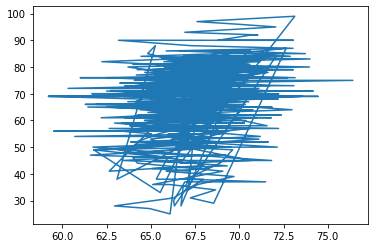

In [34]:
plt.plot(predicted, Y)
plt.show()

In [45]:
## scaled
import numpy as np 

X = top50_df[['bpm', 'nrgy', 'dnce', 'dB',
                'live', 'val', 'acous', 'spch'
                  ]]
log_Y = np.log(top50_df['Popularity'])

X_scaled = StandardScaler().fit_transform(X)

regr = linear_model.LinearRegression()
regr.fit(X_scaled, log_Y)

# Use our model to make predictions
predicted = regr.predict(X_scaled)

# Score the predictions with mse and r2
mse = mean_squared_error(log_Y, predicted)
r2 = r2_score(log_Y, predicted)

print(f"mean squared error (MSE): {mse}")
print(f"R-squared (R2): {r2}")

#print('Intercept: \n', regr.intercept_)
#print('Coefficients: \n', regr.coef_)

# with statsmodels
#X = sm.add_constant(X_scaled) # adding a constant
 
#model = sm.OLS(Y, X_scaled).fit()
#predictions = model.predict(X_scaled) 
 
#print_model = model.summary()
print(predicted)

#p#lt.plot(X_scaled, Y)
#plt.show()

mean squared error (MSE): 0.045553541513488165
R-squared (R2): 0.0369888027061398
[4.17139654 4.09904253 4.20060564 4.17955237 4.17079354 4.16480904
 4.23114692 4.15949295 4.18846185 4.24631173 4.18217785 4.1588359
 4.13730453 4.18793862 4.07266351 4.16940131 4.27180742 4.10704907
 4.12078735 4.28756619 4.20407628 4.20359998 4.23910083 4.18034184
 4.11635123 4.11709803 4.15985898 4.18353752 4.19425634 4.23175632
 4.27177968 4.16209532 4.1875914  4.1781179  4.14303577 4.25822253
 4.20479869 4.14785656 4.11753581 4.15774535 4.13647047 4.26905529
 4.12157948 4.196839   4.16411619 4.15926405 4.14240857 4.20340509
 4.09879706 4.16380239 4.21658911 4.21345602 4.15009261 4.17079354
 4.20634149 4.16073982 4.20819604 4.14789794 4.21717301 4.18523631
 4.15946918 4.14295062 4.13688058 4.1588359  4.22284775 4.21445157
 4.19329432 4.18001354 4.15481182 4.14473301 4.20291007 4.21606845
 4.21102602 4.23779202 4.17226569 4.16687002 4.13674689 4.19187649
 4.21803783 4.24579907 4.19430414 4.15207281 4.1

In [41]:
results1 = pd.DataFrame({"Predicted": predicted, "Actual": Y, "Error": predicted - Y})[["Predicted", "Actual", "Error"]].sort_values(by='Actual')
results1

,Predicted,Actual,Error
102,66.085142,25,41.085142
101,64.934041,27,37.934041
100,62.947720,28,34.947720
266,66.332338,28,38.332338
209,66.699886,28,38.699886
...,...,...,...
576,66.917085,93,-26.082915
575,72.063877,95,-22.936123
574,69.933685,96,-26.066315
573,67.606114,97,-29.393886


In [ ]:
Y.info()

In [ ]:
## not scaled

X = top50_df[['bpm',
                  ]]
Y = top50_df['pop']

regr = linear_model.LinearRegression()
regr.fit(X,Y)

print('Intercept: \n', regr.intercept_)
print('Coefficients: \n', regr.coef_)

# with statsmodels
#X = sm.add_constant(X) # adding a constant
 
#model = sm.OLS(Y, X).fit()
#predictions = model.predict(X) 
 
#print_model = model.summary()
#print(print_model)

plt.plot(Y, X)
plt.show()